In [1]:
%qtconsole

In [34]:
import numpy as np
from numpy import array, dot
import cvxopt
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score

In [22]:
def data_to_dict(file_path):
    file = open(file_path, 'r') 
    base = {}
    for i in range(10):
        base.update([('{}'.format(i),[])])
    for line in file:
        L = line.split(' ')
        L = L[0:-1]
        base['{}'.format(int(float(L[0])))].append([float(e) for e in L[1:]])
    return base

In [23]:
def data_to_array(file_path):
    file = open(file_path, 'r')
    set_ = []
    label = []
    for line in file:
        L = line.split(' ')
        label.append(int(float(L[0])))
        set_.append([float(e) for e in L[1:]])
    return set_, label

In [24]:
base_train = data_to_dict('data/zip.train')
set_test, label_test = data_to_array('data/zip.test')

In [16]:
def list_to_array(L,n):
    res = np.zeros((n,n))
    for i in range(n):
        K = [float(e) for e in L[i*n:(i+1)*n]]
        for j in range(n):
            res[i,:][j] = K[j]
    return res

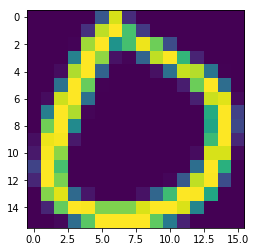

In [17]:
image = list_to_array(base_train['0'][0],16)           
imgplot = plt.imshow(image)
plt.show()

In [18]:
def define_set(k,set_dict):
    set_, label = [], []
    for i in range(10):
        L = set_dict['{}'.format(i)]
        if i==k:
            for j in range(len(L)):
                set_.append(L[j])
                label.append(1)
        else:
            for j in range(len(L)):
                set_.append(L[j])
                label.append(0)
    return set_, label

In [41]:
def classifieurs():
    clf_dict = {}
    for i in range(10):
        set_train, label_train = define_set(i,base_train)
        clf = svm.SVC(kernel="linear",C=0.1)
        clf.fit(set_train,label_train)
        clf_dict["clf{}".format(i)] = clf
    return clf_dict

In [42]:
clf_dict = classifieurs()

In [31]:
def classifier(exemple):
    classes = []
    for clf in clf_dict:
        classes.append(clf_dict[clf].predict([exemple]))
    if sum(classes) > 1:
        return -1
    elif sum(classes) == 0:
        return -1
    else:
        return classes.index(1)

In [43]:
pred = []
for i in range(len(set_test)):
    pred.append(classifier(set_test[i]))    

In [44]:
print(confusion_matrix(label_test,pred))
print(accuracy_score(label_test, pred, normalize=True))

[[  0   0   0   0   0   0   0   0   0   0   0]
 [ 18 336   0   1   1   3   0   0   0   0   0]
 [  8   0 251   0   1   2   0   1   0   1   0]
 [ 32   0   0 152   3   6   0   1   1   3   0]
 [ 29   2   0   3 124   0   5   0   1   1   1]
 [ 34   1   1   1   0 157   1   1   1   0   3]
 [ 32   2   0   0   2   1 120   0   0   0   3]
 [ 16   0   0   2   0   2   2 148   0   0   0]
 [ 19   0   0   2   0   2   0   0 120   0   4]
 [ 41   3   0   0   1   0   1   0   0 120   0]
 [ 22   0   0   0   0   1   0   0   0   1 153]]
0.8375685102142502
